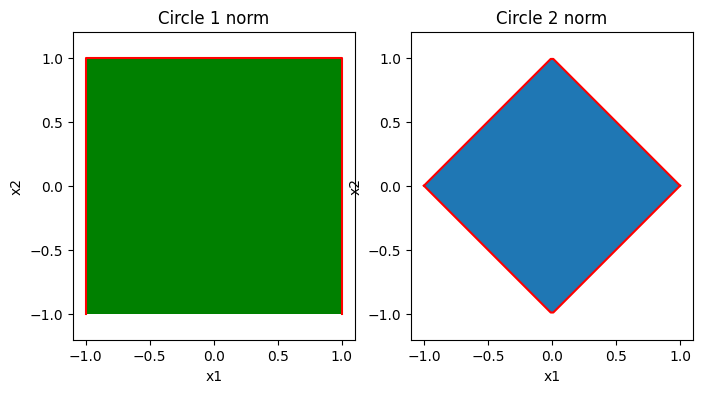

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 绘制第一个范数的单位“圆”
x1 = np.array([-1, -1, 1, 1])
y1 = np.array([-1, 1, 1, -1])
plt.figure(figsize=(8, 4))
# 子窗口
plt.subplot(1, 2, 1)
plt.plot(x1, y1, "r-")
plt.fill(x1, y1, "g-")
plt.title("Circle 1 norm")
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
# 绘制第二个范数的单位“圆”
x2 = np.linspace(-1, 1, 100)
y2_1 = 1 - np.abs(x2)
y2_2 = -1 + np.abs(x2)
plt.subplot(1, 2, 2)
plt.plot(x2, y2_1, "r-")
plt.plot(x2, y2_2, "r-")
plt.fill(np.concatenate([x2, x2[::-1]]), np.concatenate([y2_1, y2_2[::-1]]))
plt.title("Circle 2 norm")
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
# 打印图形
plt.show()


In [3]:
import numpy as np
from scipy.linalg import norm


# Hilbert函数
def Hilbert(n):
    return np.array(
        [[1 / (i + j - 1) for j in range(1, n + 1)] for i in range(1, n + 1)]
    )


k = []
for i in range(2, 17):
    H = Hilbert(i)
    H1 = np.linalg.inv(H)
    condition_number = norm(H, 2) * norm(H1, 2)
    k.append(condition_number)
n1 = [int(i) for i in range(2, 17)]
for i, j in zip(n1, k):
    print(f"n:{i},condition number:{j}")


n:2,condition number:19.281470067903975
n:3,condition number:524.0567775860627
n:4,condition number:15513.738738931195
n:5,condition number:476607.25024342386
n:6,condition number:14951058.645366283
n:7,condition number:475367356.92246985
n:8,condition number:15257575770.498339
n:9,condition number:493155048943.6214
n:10,condition number:16024874748106.477
n:11,condition number:522099521596840.8
n:12,condition number:1.6599865119517376e+16
n:13,condition number:2.310174132797193e+18
n:14,condition number:3.118213040598748e+17
n:15,condition number:3.2314656797042573e+19
n:16,condition number:3.079279460312181e+17


In [4]:
import numpy as np
from scipy.linalg import expm_cond

afa = 0.1
beta = [10**i for i in range(1, 13)]
A = np.array(
    [
        [1, -1, 0, afa - beta[0], beta[0]],
        [0, 1, -1, 0, 0],
        [0, 0, 1, -1, 0],
        [0, 0, 0, 1, -1],
        [0, 0, 0, 0, 1],
    ]
)
b = np.array([[afa], [0], [0], [0], [1]])
beta_x1 = []
# 条件数
conditon = []
for i in range(12):
    A[0, 3] = afa - beta[i]
    A[0, 4] = beta[i]
    x = np.linalg.solve(A, b)
    beta_x1.append(np.abs(x[0][0] - 1))
    conditon.append(expm_cond(A))
for i in range(12):
    print(f"beta:{beta[i]},|x1-1|:{beta_x1[i]},conditon:{conditon[i]}")


beta:10,|x1-1|:0.0,conditon:36.405452368120436
beta:100,|x1-1|:0.0,conditon:3339.7606641522066
beta:1000,|x1-1|:0.0,conditon:333999.3291246839
beta:10000,|x1-1|:0.0,conditon:33403301.051460642
beta:100000,|x1-1|:0.0,conditon:3340366922.2198777
beta:1000000,|x1-1|:0.0,conditon:334037063545.4349
beta:10000000,|x1-1|:0.0,conditon:33403710068798.703
beta:100000000,|x1-1|:0.0,conditon:3340371044045000.0
beta:1000000000,|x1-1|:0.0,conditon:3.340371022876896e+17
beta:10000000000,|x1-1|:0.0,conditon:3.340369430460875e+19
beta:100000000000,|x1-1|:0.0,conditon:3.3403710232857176e+21
beta:1000000000000,|x1-1|:0.0,conditon:3.340371023289435e+23


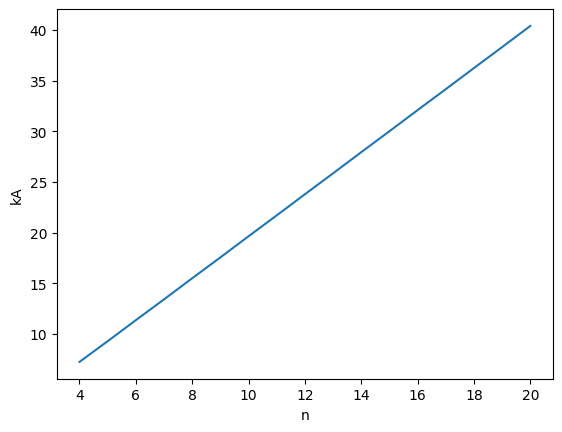

In [5]:
import matplotlib.pyplot as plt
import numpy as np


# VANDERMONDE 矩阵
def vander(n):
    t = np.array([k / n for k in range(n + 1)])
    return np.vander(t)


# 条件数
def condition_number(n):
    A = vander(n)
    A_inv = np.linalg.inv(A)
    norm_A = np.linalg.norm(A, ord=1)
    norm_A_inv = np.linalg.norm(A_inv, ord=1)
    return norm_A * norm_A_inv


condition_numbers = [condition_number(n) for n in range(4, 21)]
x = [i for i in range(4, 21)]
# 表格
plt.plot(x, np.log(condition_numbers))
plt.xlabel("n")
plt.ylabel("kA")
plt.show()


In [6]:
import numpy as np
from scipy.linalg import LinAlgError, cholesky

A = np.array([[1, 0, -1], [0, 4, 5], [-1, 5, 10]])
B = np.array([[1, 0, 1], [0, 4, 5], [-1, 5, 10]])
C = np.array([[1, 0, 1], [0, 4, 5], [1, 5, 1]])


def is_duicheng_function(A):
    try:
        # 判断对称
        if not np.allclose(A, A.T):
            return False
        # Cholesky分解：
        cholesky(A)
        return True
    except LinAlgError:
        return False


print(
    f"A:{is_duicheng_function(A)},B:{is_duicheng_function(B)},C:{is_duicheng_function(C)}"
)


A:True,B:False,C:False


(a)部分的最终时间: 0.8276174068450928
(b)部分的最终时间: 0.9015457630157471
(a)和(b)部分的运行时间比率: 0.9179982212734741


<function matplotlib.pyplot.show(close=None, block=None)>

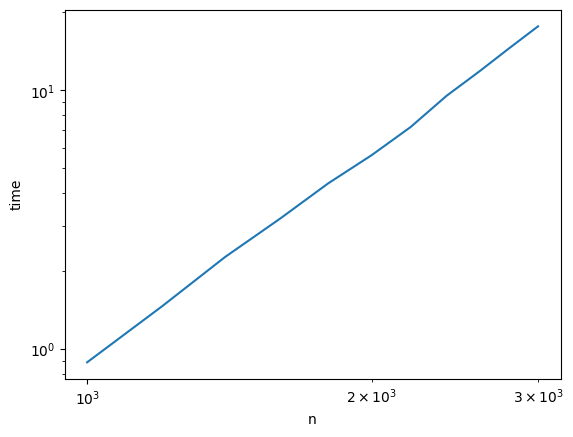

In [7]:
import time

import matplotlib.pyplot as plt
import numpy as np


def juzheng(A):
    return A


def elapsed(func):
    start_time = time.time()
    func()
    return time.time() - start_time


n = 1000
t_a = 0
for _ in range(50):
    A = np.triu(np.tril(np.random.rand(n, n), 1), -1)
    b = np.ones(n)

    def solve():
        np.linalg.solve(A, b)

    t_a += elapsed(solve)
print(f"(a)部分的最终时间: {t_a}")

# (b)部分
t_b = 0
for _ in range(50):
    A = juzheng(np.random.rand(n, n))
    b = np.ones(n)

    def solve():
        np.linalg.solve(A, b)

    t_b += elapsed(solve)
print(f"(b)部分的最终时间: {t_b}")
time_ratio = t_a / t_b
print(f"(a)和(b)部分的运行时间比率: {time_ratio}")

# (c)部分
n_values = np.arange(1000, 3001, 200)
times = []
for n in n_values:
    t_c = 0
    for _ in range(50):
        A = juzheng(np.random.rand(n, n))
        b = np.ones(n)

        def solve():
            np.linalg.solve(A, b)

        t_c += elapsed(solve)
    times.append(t_c)

plt.loglog(n_values, times)
plt.xlabel("n")
plt.ylabel("time")
plt.show
